# Let's test your implementation of KNN 

In [ ]:
# import your class on KNN
from knn import Knn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
assert Knn is not None, 'KNN should be imported'
assert 'fit' in dir(Knn) and 'predict' in dir(Knn), 'Your implementation should follow the sklearn standards (fit and predict methods)'

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [ ]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish. 

## Load your data into X and y

In [ ]:
# load your data into X and y numpy arrays
df = pd.read_csv('./datasets/results.csv')
df = df.dropna()
y = df.Survived.values
X = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].values


In [ ]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
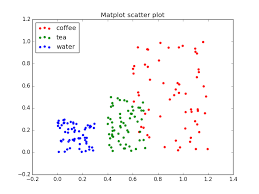

<AxesSubplot:>

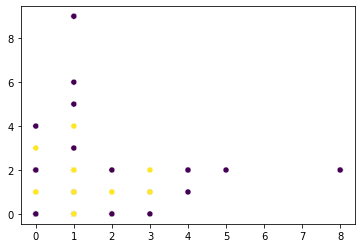

In [ ]:
# plot X showing the classes hold in y
sns.scatterplot(x=X[:,4], y=X[:,5], c=y)


## Fit the model

In [ ]:
model = Knn(k=3).fit(X,y)

this model is to lazy to fit, just go right to prediction


In [ ]:
assert model is not None and type(model) == Knn, 'Fit method should return itself'

## Predict the classes for the same data

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.1)
pred = model.predict(X_test, X_train, y_train)

In [ ]:
print("Accurracy is an excellent: ", model.evaluate(y_train), "%")

Accurracy is an excellent:  11.538461538461538 %


## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [ ]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,10,1)):
    model = Knn(k=k).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

# Repeat this process with Dataset 2 and Dataset 3

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<AxesSubplot:>

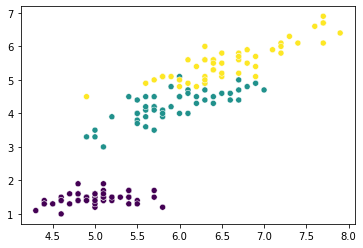

In [ ]:
d_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X = dataset.data
X_train_ir, X_test_ir, y_train_ir, y_test_ir = train_test_split(X,y) 
sns.scatterplot(x=X[:,0], y=X[:,2], c=y)

In [ ]:
knn = Knn(11)
iris_pred = knn.predict(X_test_ir, X_train_ir, y_train_ir)

print("Accuracy is ", knn.evaluate(y_test_ir), "%")

Accuracy is  78.94736842105263 %


# Data set 3 

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X_breast = dataset.data
y_breast = dataset.target

In [ ]:
assert X_breast is not None and type(X_breast) == np.ndarray, 'X should be defined and be a numpy array'
assert y_breast is not None and type(y_breast) == np.ndarray, 'y should be defined and be a numpy array'

<AxesSubplot:>

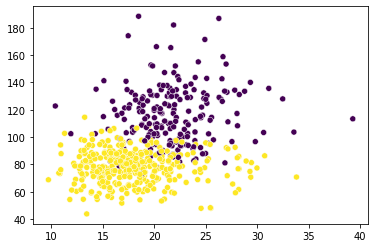

In [ ]:
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X_breast,y_breast) 
sns.scatterplot(x=X_breast[:,1], y=X_breast[:,2], c=y_breast)

In [ ]:
knn_br = Knn(11)
knn_br.predict(X_test_br,X_train_br, y_train_br)
print("accuracty is ",  knn_br.evaluate(y_test_br), "%")

accuracty is  89.5104895104895 %


# Compare performance vs Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_pred = sk_knn.fit(X_train_ir,y_train_ir).predict(X_test_ir)
print("Accuracy is ", (sk_knn.score(X_test_ir,y_test_ir) * 100 ), "%")
print("My accuarcy is ",(accuracy_score(y_test_ir,iris_pred)*100), "%")

Accuracy is  92.10526315789474 %
My accuarcy is  73.68421052631578 %
